In [1]:
%load_ext autoreload
%autoreload 2

import os
import sys

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm

from moment.common import PATHS
from moment.data.load_data import convert_tsf_to_dataframe
from moment.data.forecasting_datasets import \
    get_forecasting_datasets, ShortForecastingDataset, LongForecastingDataset

In [2]:
forecasting_datasets = get_forecasting_datasets(collection="autoformer")

In [3]:
forecasting_datasets

['/XXXX-14/project/public/XXXX-9/TimeseriesDatasets/forecasting/autoformer/electricity.csv',
 '/XXXX-14/project/public/XXXX-9/TimeseriesDatasets/forecasting/autoformer/ETTm2.csv',
 '/XXXX-14/project/public/XXXX-9/TimeseriesDatasets/forecasting/autoformer/national_illness.csv',
 '/XXXX-14/project/public/XXXX-9/TimeseriesDatasets/forecasting/autoformer/ETTh2.csv',
 '/XXXX-14/project/public/XXXX-9/TimeseriesDatasets/forecasting/autoformer/traffic.csv',
 '/XXXX-14/project/public/XXXX-9/TimeseriesDatasets/forecasting/autoformer/ETTh1.csv',
 '/XXXX-14/project/public/XXXX-9/TimeseriesDatasets/forecasting/autoformer/exchange_rate.csv',
 '/XXXX-14/project/public/XXXX-9/TimeseriesDatasets/forecasting/autoformer/weather.csv',
 '/XXXX-14/project/public/XXXX-9/TimeseriesDatasets/forecasting/autoformer/ETTm1.csv']

In [25]:
dataset = LongForecastingDataset(
    full_file_path_and_name=forecasting_datasets[5],
    seq_len=512, 
    pred_len=96,
    data_split='train', 
    target_col='OT',
    scale=True, 
    stride_len=1, 
    task='forecasting',
    train_ratio= 0.6, 
    val_ratio= 0.1, 
    test_ratio= 0.3,
    output_type='multivariate')

In [15]:
dataset

LongForecastingDataset(dataset_name=ETTh1,length_timeseries=3392,length_dataset=2785,n_channels=7,seq_len=512,forecast_horizon=96,data_split=test,target_col=OT,scale=True,data_stride_len=1,task_name=long-horizon-forecasting,train_ratio=0.6,val_ratio=0.1,test_ratio=0.3,output_type=multivariate)

In [16]:
dataset.data.shape

(3392, 7)

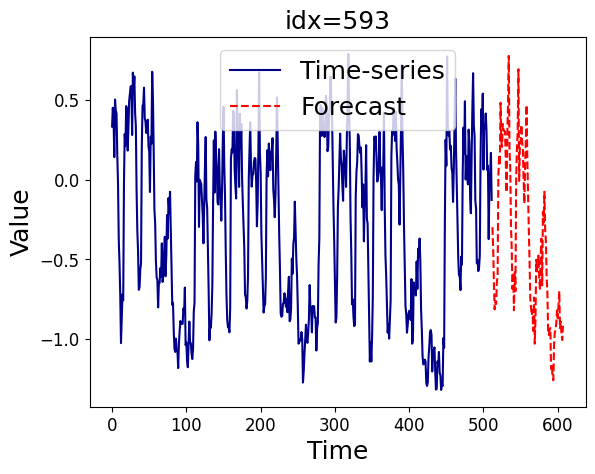

In [15]:
idx = np.random.randint(0, len(dataset))
dataset.plot(idx)

In [16]:
dataset[0]

TimeseriesData(timeseries=array([[-2.24194131e+00, -1.04352921e+00, -1.16995901e+00,
        -1.22159936e+00, -1.24652918e+00, -1.20913445e+00,
        -1.25543269e+00, -1.25543269e+00, -1.31953794e+00,
        -1.49582739e+00, -1.46199406e+00, -1.39610810e+00,
        -1.34624846e+00, -1.21803795e+00, -1.08448534e+00,
        -1.09338885e+00, -1.06489763e+00, -1.00969588e+00,
        -8.45871344e-01, -7.44371359e-01, -8.13818717e-01,
        -8.90388881e-01, -9.50932732e-01, -1.07023973e+00,
        -1.13256428e+00, -1.07380113e+00, -1.07023973e+00,
        -1.04530991e+00, -1.01325728e+00, -1.10941516e+00,
        -1.20201164e+00, -7.44371359e-01, -6.41090673e-01,
        -1.26467943e-01,  8.54355345e-02,  1.49540788e-01,
         2.93777609e-01,  1.51321490e-01, -3.81369347e-05,
        -7.30468979e-02, -1.96258533e-02,  1.15707460e-01,
         9.07776390e-02, -2.01257405e-01, -3.88231061e-01,
        -2.13722315e-01,  2.06523236e-01,  5.02119683e-01,
         1.44198684e-01, -8.01